## Broden Dataset - General Info

#### Sources:
    - ADE -> scene, object, part
    - Pascal -> object, part
    - OpenSurfaces -> material
    - DTD -> texture
#### Categories:
    - color
    - object
    - part
    - material
    - scene
    - texture
    
#### Files:
    - category.csv (information about each category: 6 categories)
    - index.csv (information about each image: 63305 images)
    - label.csv (information about each label: 1197 labels)
    - c_*(category).csv (information about labels in each category)

#### Structures:
    - Each label is associated with a unique label number (range from 1 to 1197)
    - Each label is also associated with a label code within its categories
    - Each label belongs to one or more categories
    - Some labels have semantic information associated with them
    - Each image in Broden_224 is of size 224 x 224
    - Each image may or may not be associated some labels

## Broden Dataset - Load Data
- fo = FeatureOperator() 
- fo.data is a SegmentationData() object that stores Broden Data

###  fo.data.category

In [ ]:
OrderedDict([('color', OrderedDict([('name', 'color'), ('first', '1'), ('last', '11'), ('count', '11'), ('frequency', '651776')])), 
('object', OrderedDict([('name', 'object'), ('first', '12'), ('last', '1197'), ('count', '584'), ('frequency', '271047')])), 
('part', OrderedDict([('name', 'part'), ('first', '12'), ('last', '1186'), ('count', '234'), ('frequency', '132414')])), 
('scene', OrderedDict([('name', 'scene'), ('first', '59'), ('last', '1179'), ('count', '468'), ('frequency', '17746')])), 
('texture', OrderedDict([('name', 'texture'), ('first', '237'), ('last', '391'), ('count', '47'), ('frequency', '6611')]))])

### fo.data.label[24]:

In [ ]:
{'number': 24, 'name': 'fabric', 'category': {'material': 7056, 'object': 932, 'part': 2}, 
 'frequency': 7990, 'coverage': 689.136189, 'syns': ['textile', 'cloth']}

### fo.data.image[0]:

In [ ]:
{'image': 'opensurfaces/25605.jpg', 'split': 'train', 'ih': 224, 'iw': 224, 'sh': 112, 'sw': 112, 
 'color': ['opensurfaces/25605_color.png'], 'object': [], 'part': [], 'material': ['opensurfaces/25605_material.png'], 
 'scene': [], 'texture': []}

## Broden Dataset - Images

In [1]:
import os
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
DATA_DIRECTORY = '../../../project/rcc/deep_learning_hack/netdissect/broden1_224'

### original image

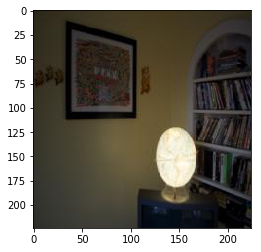

In [4]:
image_path = os.path.join(DATA_DIRECTORY, "images", "opensurfaces/62174.jpg")
image = Image.open(image_path)
plt.imshow(image)

### color

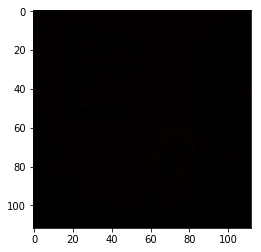

In [5]:
color_image_path = os.path.join(DATA_DIRECTORY, "images", "opensurfaces/62174_color.png")
color_image = Image.open(color_image_path)
plt.imshow(color_image)

In [7]:
# image_color.png stores color category for each pixel
# length = 112 x 112 = 12544
print(list(color_image.getdata())[9060]) # label number 5 -> green
color_pixel = color_image.load()

(5, 0, 0)


In [8]:
# pinpoint "yellow"
yellow_pixel = [[(255, 255, 0) if color_pixel[i, j] == (9, 0, 0) else (255, 255, 255) for i in range(color_image.size[0])] for j in range(color_image.size[1])]

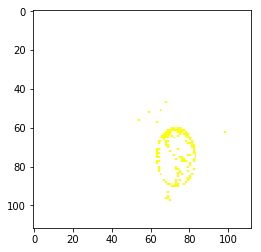

In [9]:
plt.imshow(yellow_pixel)

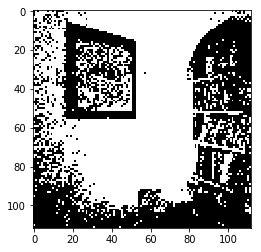

In [10]:
# pinpoint "black"
black_pixel = [[(0, 0, 0) if color_pixel[i, j] == (1, 0, 0) else (255, 255, 255) for i in range(color_image.size[0])] for j in range(color_image.size[1])]
plt.imshow(black_pixel)

In [11]:
# reconstruct the whole picture using color information
color_map = {(1, 0, 0): (0, 0, 0),
            (2, 0, 0): (128, 128, 128),
            (3, 0, 0): (255, 255, 255),
            (4, 0, 0): (128, 64, 0),
            (5, 0, 0): (0, 255, 0),
            (6, 0, 0): (255, 128, 255),
            (7, 0, 0): (64, 0, 128),
            (8, 0, 0): (0, 0, 255),
            (9, 0, 0): (255, 255, 0),
            (10, 0, 0): (255, 0, 0),
            (11, 0, 0): (255, 128, 0)}

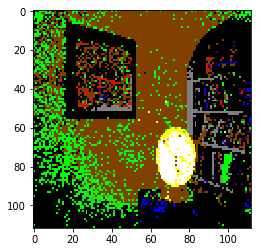

In [12]:
row = color_image.size[0]
column = color_image.size[1]

re_pixel = [[color_map[color_pixel[i, j]] for i in range(row)] for j in range(column)]
plt.imshow(re_pixel)

### material

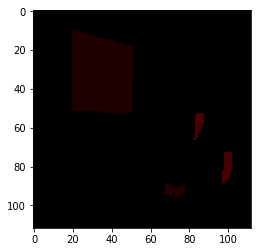

In [13]:
image_path = os.path.join(DATA_DIRECTORY, "images", "opensurfaces/62174_material.png")
image = Image.open(image_path) 
plt.imshow(image)

In [14]:
list(image.getdata())[9060] # label number 71 -> paper (material)

(71, 0, 0)

### original image

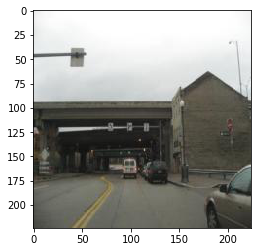

In [15]:
image_path = os.path.join(DATA_DIRECTORY, "images", "ade20k/ADE_val_00001995.jpg")
image = Image.open(image_path) 
plt.imshow(image)

### part

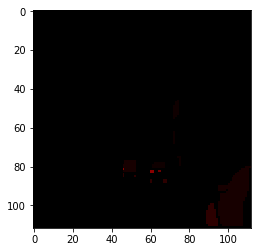

In [16]:
image_path = os.path.join(DATA_DIRECTORY, "images", "ade20k/ADE_val_00001995_part_1.png")
image = Image.open(image_path) 
plt.imshow(image)

In [17]:
list(image.getdata())[9118] # label number 139 -> taillight(part)

(139, 0, 0)

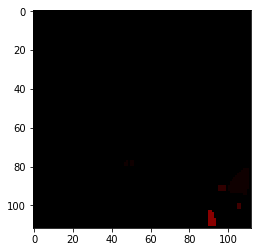

In [18]:
image_path = os.path.join(DATA_DIRECTORY, "images", "ade20k/ADE_val_00001995_part_2.png")
image = Image.open(image_path) 
plt.imshow(image)

In [19]:
parts = set([tup for tup in list(image.getdata()) if tup[0] != 0])
print(parts)

# label number 137 -> rim (part)
# label number 48 -> mirror (part)
# label numebr 64 -> handle (part)
# label number 15 -> windowpane (object, part)
# not sure what the second index stands for

{(137, 0, 0), (48, 0, 0), (64, 0, 0), (15, 0, 0)}


### object

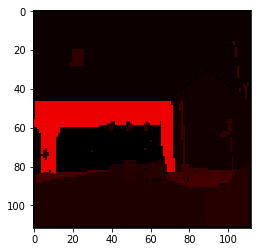

In [20]:
image_path = os.path.join(DATA_DIRECTORY, "images", "ade20k/ADE_val_00001995_object.png")
image = Image.open(image_path) 
plt.imshow(image)

In [21]:
objects = set([tup for tup in list(image.getdata()) if tup[0] != 0])
print(objects)

# label number 12 -> wall (object, part)
# label number 68 -> earth (object)
# label number 18 -> building (object)
# label number 31 -> road (object)
# label number 60 -> streetlight (object)
# label number 57 -> fence (object, part)
# label number 38 -> car (object)
# label number 13 -> sky (object, material)
# label number 47 -> signboard (object, part)
# label number 236 -> bridge (object)

{(12, 0, 0), (68, 0, 0), (18, 0, 0), (31, 0, 0), (60, 0, 0), (57, 0, 0), (38, 0, 0), (13, 0, 0), (47, 0, 0), (236, 0, 0)}


In [22]:
# pinpoint "bridge"
obj_image_path = os.path.join(DATA_DIRECTORY, "images", "ade20k/ADE_val_00001995_object.png")
obj_image = Image.open(obj_image_path) 
obj_pixel = obj_image.load()

bridge_pixel = [[(0, 0, 0) if obj_pixel[i, j] == (236, 0, 0) else (255, 255, 255) for i in range(obj_image.size[0])] for j in range(obj_image.size[1])]

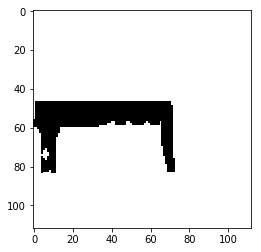

In [23]:
plt.imshow(bridge_pixel)

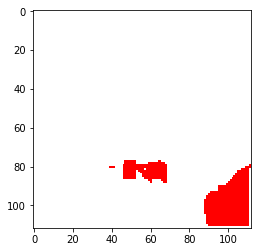

In [24]:
# pinpoint "car"
car_pixel = [[(255, 0, 0) if obj_pixel[i, j] == (38, 0, 0) else (255, 255, 255) for i in range(obj_image.size[0])] for j in range(obj_image.size[1])]
plt.imshow(car_pixel)

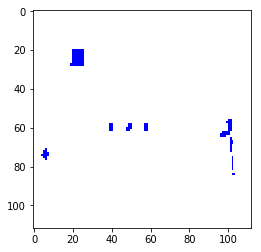

In [25]:
# pinpoint "road"
signboard_pixel = [[(0, 0, 255) if obj_pixel[i, j] == (47, 0, 0) else (255, 255, 255) for i in range(obj_image.size[0])] for j in range(obj_image.size[1])]
plt.imshow(signboard_pixel)

## NetDissect - Feature extraction
- hook features from layer 4 of resnet18
- features is of shape # features to probe (1) x # images x # units (512) x 7 x 7
- maxfeatures stores the maximum activation of each unit, it is of size # features to probe (1) x # images x # units

In [3]:
import numpy as np

In [4]:
MODEL = 'resnet18'  
DATASET = 'places365'
OUTPUT_FOLDER = "../../../project2/bermanm/netdissect/dissection/" + MODEL + "_" + DATASET

In [5]:
# load feature map
maxfeatures = [None] * 1
features = [None] * 1
features_size = [None] * 1
features_size_file = os.path.join(OUTPUT_FOLDER, "feature_size.npy")
mmap_file =  os.path.join(OUTPUT_FOLDER, "%s.mmap" % "layer4")
mmap_max_file = os.path.join(OUTPUT_FOLDER, "%s_max.mmap" % "layer4")
features_size = np.load(features_size_file)
features[0] = np.memmap(mmap_file, dtype=float,mode='r', shape=tuple(features_size[0]))
maxfeatures[0] = np.memmap(mmap_max_file, dtype=float, mode='r', shape=tuple(features_size[0][:2]))

In [6]:
f = features[0]
print("shape of features", f.shape)
mf =maxfeatures[0]
print("shape of maxfeatures", mf.shape)

shape of features (63305, 512, 7, 7)
shape of maxfeatures (63305, 512)


## NetDissect - Threshold
- an activation threshold T_k is computed for each unit k such that P(a_k > T_k) = 0.005 for each k
- thresholds is an 1D array of length 512 (number of units)

In [7]:
# load thresholds
qtpath = os.path.join(OUTPUT_FOLDER, "quantile.npy")
thresholds = np.load(qtpath)

In [8]:
thresholds.shape

(512,)

## NetDissect - Tally
    1. feed in concept maps
    2. tally_labels (1D array of dimension 1198) stores the number of pixels associated with each label; if the label's category is color or object, then count related pixels from the concept map; otherwise simply add 112 * 112 = 12544 pixel to the label
    3. extract the feature (activation) map from each of the 512 units. The feature map is of shape 7 x 7, so dilate it to 112 x 112 using bilinear interpolation (according to the paper) if the maximum activation of the feature map exceed the activation threshold for this particular unit. Call the resized feature map "mask".
    4. get all indices of the mask where activation > threshold (i.e. the pixel is "activated"); add the number of such indices to tally_units (1D array of dimension 512), which stores the number of activated pixels for each unit.
    5. tally_both (2D array of dimension 512 x 1198) stores the number of activated pixels for each unit and label; tally_units_cat (2D array of dimension 512 x 5) stores the number of activated pixels for each unit and category.
    6. compute iou_{unit k, label c} (intersection over union) = \frac{\sum (over images){number of activated pixels for image x, unit k \cap number of pixels for image x, label c}}{\sum (over images) {number of activated pixels for image x, unit k \cup number of pixels for image x, label c}}

### inputs to tally function are concept maps
- 'color' categorizes each pixel into one of the 11 color categories
- 'object', 'part', 'scene', 'texture' store label number assigned to this particular image
- 'color' and 'object' are tracked for each pixel; 'part', 'scene' and 'texture' labels are assigned to the whole image
- 'i' is the image index

### sample concept map 1

In [9]:
cmap1 = dict(np.load(os.path.join(OUTPUT_FOLDER, "sample_cm1.npz")))
cmap1

{'color': array([[[8, 8, 8, ..., 1, 1, 1],
         [8, 8, 8, ..., 1, 1, 1],
         [8, 1, 5, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 5, 1],
         [5, 1, 1, ..., 1, 1, 1],
         [5, 5, 1, ..., 1, 1, 1]]], dtype=int16),
 'object': array([[[ 0,  0,  0, ...,  0,  0,  0],
         [ 0, 16, 16, ..., 16, 16, 16],
         [ 0, 16, 16, ..., 16, 16, 16],
         ...,
         [ 0, 33, 33, ..., 35, 35, 33],
         [ 0, 33, 33, ..., 33, 35, 33],
         [ 0, 33,  0, ...,  0,  0, 33]]], dtype=int16),
 'part': array([], dtype=float64),
 'scene': array([], dtype=float64),
 'texture': array([], dtype=float64),
 'sh': array(112),
 'sw': array(112),
 'i': array(48),
 'fn': array('../../../project/rcc/deep_learning_hack/netdissect/broden1_224/images/ade20k/ADE_train_00013280.jpg',
       dtype='<U99')}

#### image

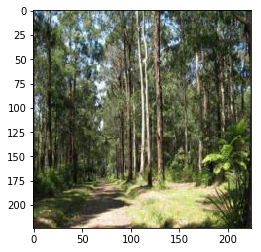

In [10]:
image_path = os.path.join(DATA_DIRECTORY, "images", "ade20k/ADE_train_00013280.jpg")
image = Image.open(image_path)
plt.imshow(image)

#### color

In [16]:
row = cmap1['color'].shape[1]
column = cmap1['color'].shape[2]
print(row, column)

112 112


In [23]:
cmap_color_map = {0: (255, 255, 255),
            1: (0, 0, 0),
            2: (128, 128, 128),
            3: (255, 255, 255),
            4: (128, 64, 0),
            5: (0, 255, 0),
            6: (255, 128, 255),
            7: (64, 0, 128),
            8: (0, 0, 255),
            9: (255, 255, 0),
            10: (255, 0, 0),
            11: (255, 128, 0)}

In [24]:
cmap1_color_reconstruction = [[cmap_color_map[cmap1['color'][0, j, i]] for i in range(row)] for j in range(column)]

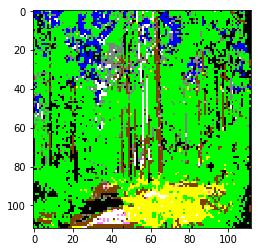

In [25]:
plt.imshow(cmap1_color_reconstruction)

#### object

In [21]:
np.unique(cmap1['object'][0])

array([  0,  16,  33,  35, 442], dtype=int16)

- 16: tree
- 33: grass
- 35: plant
- 442: dirt

In [22]:
cmap1_object = {0: (255, 255, 255), 16: (0, 102, 24), 33: (153, 255, 153), 35: (0, 204, 68), 442: (153, 102, 51)}

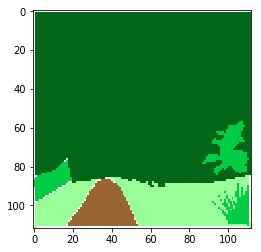

In [26]:
cmap1_object_reconstruction = [[cmap1_object[cmap1['object'][0, j, i]] for i in range(row)] for j in range(column)]
plt.imshow(cmap1_object_reconstruction)

### sample concept map 2

In [28]:
cmap2 = dict(np.load(os.path.join(OUTPUT_FOLDER, "sample_cm2.npz")))
cmap2

{'color': array([[[5, 5, 5, ..., 3, 3, 3],
         [5, 5, 5, ..., 3, 3, 3],
         [5, 5, 5, ..., 3, 3, 3],
         ...,
         [5, 5, 5, ..., 5, 5, 5],
         [5, 5, 5, ..., 5, 5, 5],
         [5, 5, 5, ..., 5, 5, 5]]], dtype=int16),
 'object': array([[[16, 16, 16, ..., 13, 13,  0],
         [16, 16, 16, ..., 13, 13,  0],
         [16, 16, 16, ..., 13, 13,  0],
         ...,
         [33, 33, 33, ..., 33, 33,  0],
         [33, 33, 33, ..., 33, 33,  0],
         [ 0,  0,  0, ...,  0,  0,  0]]], dtype=int16),
 'part': array([], dtype=float64),
 'scene': array([933]),
 'texture': array([], dtype=float64),
 'sh': array(112),
 'sw': array(112),
 'i': array(64),
 'fn': array('../../../project/rcc/deep_learning_hack/netdissect/broden1_224/images/ade20k/ADE_train_00015681.jpg',
       dtype='<U99')}

#### image

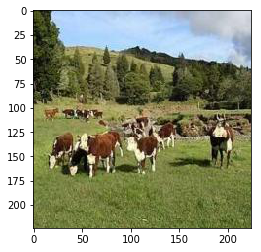

In [29]:
image_path = os.path.join(DATA_DIRECTORY, "images", "ade20k/ADE_train_00015681.jpg")
image = Image.open(image_path)
plt.imshow(image)

#### scene
- 933: ranch

### compute IOU for each unit and label
- iou is stored as a 512 x 1198 2D array

In [34]:
units = 512
labels = 1198
categories = 5

#### tally_both[k, c] = number of pixels activated by unit k and has information about label c

In [35]:
tally_both = np.zeros((units,labels),dtype=np.float64) 
print("shape of tally_both", tally_both.shape)

shape of tally_both (512, 1198)


#### tally_units_cat[k, c] =  number of pixels activated by unit k if label is in the catogories related to this image; 0 otherwise. 
- In other words, we can view tally_units_cat as the number of activated pixels

In [40]:
tally_units_cat = np.zeros((units, categories), dtype=np.float64)
print("shape of tally_units_cat", tally_units_cat.shape)
labelcat = np.zeros((labels, categories))
tally_units_cat = np.dot(tally_units_cat, labelcat.T)
print("now shape of tally_units_cat", tally_units_cat.shape)

shape of tally_units_cat (512, 5)
now shape of tally_units_cat (512, 1198)


#### tally_labels[c] = number of pixels associated with label c

In [41]:
tally_labels = np.zeros(labels,dtype=np.float64)
print("shape of tally_labels", tally_labels.shape)

shape of tally_labels (1198,)


#### IOU is simply an application of inclusion-exclusion

In [42]:
iou = tally_both / (tally_units_cat + tally_labels[np.newaxis,:] - tally_both + 1e-10)

In [43]:
print("shape of iou", iou.shape)

shape of iou (512, 1198)


### Tally result

In [48]:
import csv
import re
def load_csv(filename, readfields=None):
    def convert(value):
        if re.match(r'^-?\d+$', value): # ok regular expression stuffs
            try:
                return int(value)
            except:
                pass
        if re.match(r'^-?[\.\d]+(?:e[+=]\d+)$', value):
            try:
                return float(value)
            except:
                pass
        return value
    
    with open(filename) as f:
        reader = csv.DictReader(f)
        result = [{k: convert(v) for k, v in row.items()} for row in reader]
        if readfields is not None:
            readfields.extend(reader.fieldnames)
    return result

In [49]:
tally_path = os.path.join(OUTPUT_FOLDER, "tally.csv")
tally_result = load_csv(tally_path)

In [54]:
tally_result[0]

{'unit': 454,
 'category': 'object',
 'label': 'car',
 'score': '0.27031035989056845',
 'color-label': 'red-c',
 'color-truth': '21004512.0',
 'color-activation': '3501729.0',
 'color-intersect': '194719.0',
 'color-iou': '0.008009329897157405',
 'object-label': 'car',
 'object-truth': '5354795.0',
 'object-activation': '3229749.0',
 'object-intersect': '1826712.0',
 'object-iou': '0.27031035989056845',
 'part-label': 'wheel',
 'part-truth': '1513439.0',
 'part-activation': '2658986.0',
 'part-intersect': '112686.0',
 'part-iou': '0.027756956789586718',
 'scene-label': 'auto_showroom-s',
 'scene-truth': '301056.0',
 'scene-activation': '1004210.0',
 'scene-intersect': '56059.0',
 'scene-iou': '0.044875669124492576',
 'texture-label': '',
 'texture-truth': '24924928.0',
 'texture-activation': '99291.0',
 'texture-intersect': '91623.0',
 'texture-iou': '0.003674827924055722'}

## Visualize
1. sort tally_result by score (iou) and some other criterion
2. find top 10 images with maximum activation for each unit in the sorted tally_result
3. maintain the RGB of a pixel if the activation at this pixel > unit threshold; otherwise assigns (0.2R, 0.2G, 0.2B), which gives a black-ish color

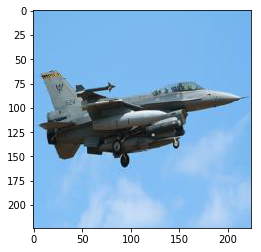

In [97]:
# assume this is a top image for label "airplane"
image_path = os.path.join(OUTPUT_FOLDER, "visualize_example1.jpg")
image = Image.open(image_path)
plt.imshow(image)